#Übersicht der Trainings-Ergebnisse der GCN-Modelle 

In [1]:
from pathlib import Path
# Hauptordner-Pfad
path = Path("/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM")
%cd "/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM"

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM


In [2]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

## Model-Ergebnisse laden

In [3]:
# GCN Review-Log ab
name_review_ab = "review_sn_f3_ohe_2"
review_ab_results = joblib.load(f"models//training/{name_review_ab}/results.joblib")

In [4]:
# GCN Review-Log eb
name_review_eb = "review_all_events_f5_ohe_2_prefix"
review_eb_results = joblib.load(f"models//training/{name_review_eb}_{0}/results.joblib")

In [5]:
# GCN Loan-Log ab
name_loan_ab = "loan_sn_f2_ohe_wEvents_4_nreb"
loan_ab_results =joblib.load(f"models/training/{name_loan_ab}/results.joblib")

In [6]:
# GCN Loan-Log eb
name_loan_eb = "loan_all_events_fall_ohe_wEvents_5_2"
loan_eb_results = joblib.load(f"models//training/{name_loan_eb}_{0}/results.joblib")


###Präfixe - Review


In [7]:
# Dictionary mit allen Präfix-Results erstellen
präfix_results_list = {}
for i in [4,7,10,13,16,19]:
  results = joblib.load(f"models//training/{name_review_eb}_{i}/results.joblib")  
  präfix_results_list.update(results)


### Präfixe - Loan

In [8]:
präfix_loan_list = {}
for i in [4,7,10,13,16,19]:
  results = joblib.load(f"models//training/{name_loan_eb}_{i}/results.joblib")  
  präfix_loan_list.update(results)

## Übersicht über die Accuracy des Trainings für ganze Graphen
**Aktivität basierte Results Aufbau**

result = [[Epoche, train_acc, val_acc, error], ..., test_acc]

**Event-basierte Results Aufbau**

result {4: [[[Epoche, train_acc, val_acc, error], ...], test_acc], 7: ...}

### Gesamt-Ergebnis

In [9]:
train_acc_review_ab, val_acc_review_ab = review_ab_results[-2][1:3]
test_acc_review_ab = review_ab_results[-1][1]

In [10]:
train_acc_review_eb, val_acc_review_eb = review_eb_results[0][0][-1][1:3]
test_acc_review_eb = review_eb_results[0][-1]

In [11]:
train_acc_loan_ab, val_acc_loan_ab = loan_ab_results[-2][1:3]
test_acc_loan_ab = loan_ab_results[-1][1]

In [12]:
train_acc_loan_eb, val_acc_loan_eb = loan_eb_results[0][0][-1][1:3]
test_acc_loan_eb = loan_eb_results[0][-1]

In [13]:
results_data  = {"Train Acc.": [train_acc_review_ab, train_acc_review_eb, train_acc_loan_ab, train_acc_loan_eb], 
                 "Val. Acc.": [val_acc_review_ab, val_acc_review_eb, val_acc_loan_ab, val_acc_loan_eb],
                 "Test Acc.": [test_acc_review_ab, test_acc_review_eb, test_acc_loan_ab, test_acc_loan_eb]}

In [14]:
pd.DataFrame(results_data, index = ["GCN Review ab", "GCN Review eb", "GCN Loan ab", "GCN Loan eb"])

,Train Acc.,Val. Acc.,Test Acc.
GCN Review ab,0.999857,0.997500,0.998000
GCN Review eb,0.999286,1.000000,1.000000
GCN Loan ab,0.894392,0.888571,0.880968
GCN Loan eb,0.918816,0.865648,0.857734


### Accuracy in Abhängigkeit zu Epochen
Es wird die Trainings-Genauigkeit verwendet

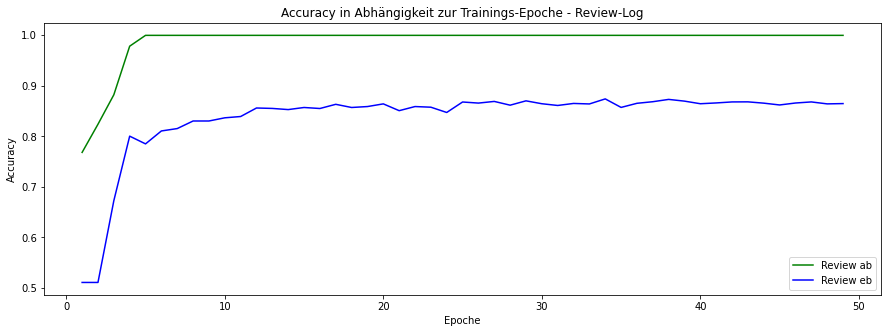

In [18]:
# number of employees of A
acc_gcn_ab = [x[1] for x in review_ab_results[:-1]]
acc_gcn_eb = [x[1] for x in review_eb_results[0][0][:50]]
epochs = [x[0] for x in review_ab_results[:-1]]
fig = plt.figure(figsize=(15, 5))

# plot a line chart
plt.plot(epochs, acc_gcn_ab, 'g')
plt.plot(epochs, acc_gcn_eb[:len(epochs)], 'b')

# set axis titles
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
# set chart title
plt.title(f"Accuracy in Abhängigkeit zur Trainings-Epoche - Review-Log")
plt.legend(['Review ab', 'Review eb'])
plt.show()

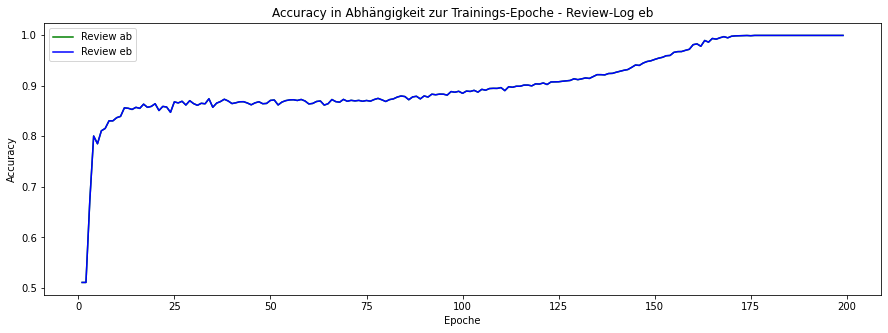

In [32]:
# number of employees of A
acc_gcn_eb = [x[1] for x in review_eb_results[0][0]]
epochs = [x[0] for x in review_eb_results[0][0]]
fig = plt.figure(figsize=(15, 5))

# plot a line chart
plt.plot(epochs, acc_gcn_eb, 'g')
plt.plot(epochs, acc_gcn_eb[:len(epochs)], 'b')

# set axis titles
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
# set chart title
plt.title(f"Accuracy in Abhängigkeit zur Trainings-Epoche - Review-Log eb")
plt.legend(['Review ab', 'Review eb'])
plt.show()

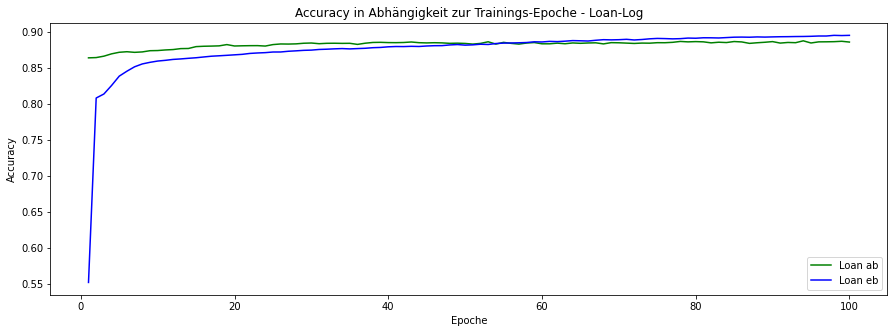

In [31]:
# number of employees of A
acc_gcn_ab = [x[1] for x in loan_ab_results[:-1][:100]]
acc_gcn_eb = [x[1] for x in loan_eb_results[0][0][:100]]
epochs = [x[0] for x in loan_ab_results[:-1][:100]]
fig = plt.figure(figsize=(15, 5))

# plot a line chart
plt.plot(epochs, acc_gcn_ab, 'g')
plt.plot(epochs, acc_gcn_eb[:len(epochs)], 'b')

# set axis titles
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
# set chart title
plt.title(f"Accuracy in Abhängigkeit zur Trainings-Epoche - Loan-Log")
plt.legend(['Loan ab', 'Loan eb'])
plt.show()

## Übersicht über die Accuracy des Trainings für Präfixe

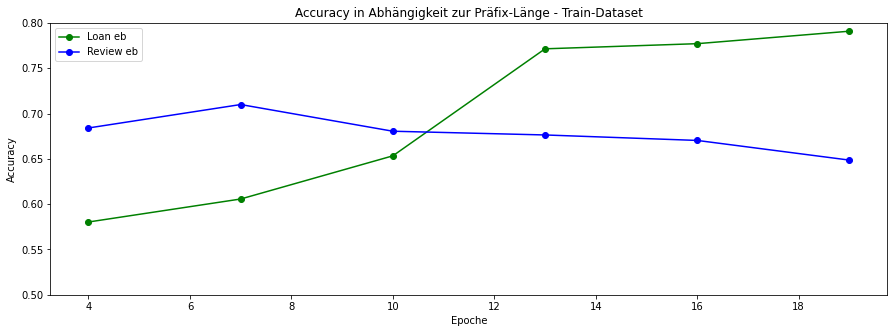

In [35]:
# number of employees of A
acc_gcn_p_loan = [präfix_loan_list[x][0][-1][1] for x in präfix_loan_list]
acc_gcn_p_review = [präfix_results_list[x][0][-1][1] for x in präfix_results_list]
#acc_ggnn = [x[3] for x in train_results_ggnn]
#pre = [x for x in range(1, num_epochs)]
pre = [k for k in präfix_loan_list]
fig = plt.figure(figsize=(15, 5))

# plot a line chart
plt.plot(pre, acc_gcn_p_loan, 'o-g')
plt.plot(pre, acc_gcn_p_review, 'o-b')

#plt.plot(epochs[:50], acc_ggnn[:50], 'o-r')
ax = plt.gca()
ax.set_ylim([0.5, 0.8])

# set axis titles
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
# set chart title
plt.title(f"Accuracy in Abhängigkeit zur Präfix-Länge - Train-Dataset")
plt.legend(['Loan eb', 'Review eb'])
plt.show()

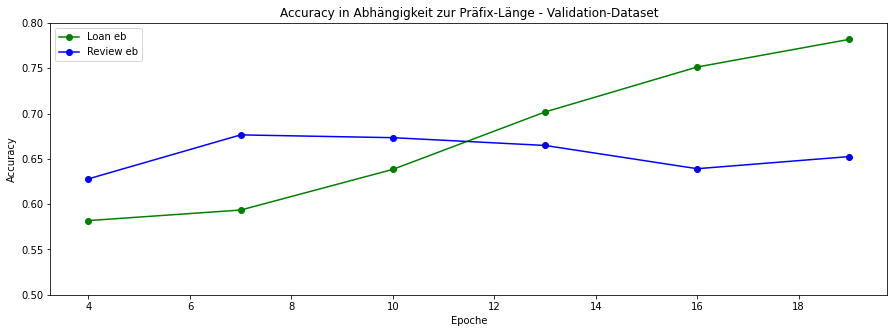

In [36]:
# number of employees of A
val_acc_gcn_p_loan = [präfix_loan_list[x][0][-1][2] for x in präfix_loan_list]
val_acc_gcn_p_review = [präfix_results_list[x][0][-1][2] for x in präfix_results_list]
#acc_ggnn = [x[3] for x in train_results_ggnn]
#pre = [x for x in range(1, num_epochs)]
pre = [k for k in präfix_loan_list]
fig = plt.figure(figsize=(15, 5))

# plot a line chart
plt.plot(pre, val_acc_gcn_p_loan, 'o-g')
plt.plot(pre, val_acc_gcn_p_review, 'o-b')

#plt.plot(epochs[:50], acc_ggnn[:50], 'o-r')
ax = plt.gca()
ax.set_ylim([0.5, 0.8])

# set axis titles
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
# set chart title
plt.title(f"Accuracy in Abhängigkeit zur Präfix-Länge - Validation-Dataset")
plt.legend(['Loan eb', 'Review eb'])
plt.show()

In [37]:
val_acc_gcn_p_loan = [präfix_loan_list[x][0][-1][2] for x in präfix_loan_list]
val_acc_gcn_p_review = [präfix_results_list[x][0][-1][2] for x in präfix_results_list]

In [38]:
test_acc_gcn_p_loan = [präfix_loan_list[x][-1] for x in präfix_loan_list]
test_acc_gcn_p_review = [präfix_results_list[x][-1] for x in präfix_results_list]

In [39]:
train_acc = acc_gcn_p_review + acc_gcn_p_loan

In [40]:
val_acc = val_acc_gcn_p_review + val_acc_gcn_p_loan

In [41]:
test_acc = test_acc_gcn_p_review + test_acc_gcn_p_loan

In [42]:
results_data  = {"Train Acc.": train_acc, 
                 "Val. Acc.": val_acc,
                 "Test Acc.": test_acc}

In [43]:
pd.DataFrame(results_data, index = ["Review eb - 4", "Review eb - 7", "Review eb - 10", "Review eb - 13", "Review eb - 16", "Review eb - 19", "Loan eb - 4", "Loan eb - 7", "Loan eb - 10", "Loan eb - 13", "Loan eb - 16", "Loan eb - 19" ])

,Train Acc.,Val. Acc.,Test Acc.
Review eb - 4,0.684143,0.628000,0.652000
Review eb - 7,0.710000,0.676500,0.698000
Review eb - 10,0.680543,0.673426,0.669157
Review eb - 13,0.676425,0.664848,0.682424
Review eb - 16,0.670383,0.639175,0.642647
Review eb - 19,0.648670,0.652582,0.620301
Loan eb - 4,0.580354,0.581925,0.576801
Loan eb - 7,0.605736,0.593555,0.587047
Loan eb - 10,0.653385,0.638427,0.628334
Loan eb - 13,0.771506,0.701805,0.700415
